Step1: Import libraries. (Use are free to use other libraries for plotting/visualisations)
●	Numpy
●	Matplotlib.pyplot/Seaborne
●	Train test split
●	Confusion matrix


In [54]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

Step2: Generate synthetic data for two classes. Use above given parameters for samples distribution or of your choice. Also seed(0) for reproducibility.

In [55]:

# Parameters
total_no_of_samples = 500
learning_rate = 0.1
bias = 1
max_epochs = 1000

In [56]:
# Distribution 1
mu1 = np.array([-2, -2])
sigma1 = np.array([[0.9, -0.0255], [-0.0255, 0.9]])
distribution1 = np.random.multivariate_normal(mu1, sigma1, total_no_of_samples // 2)

# Distribution 2
mu2 = np.array([5, 5])
sigma2 = np.array([[0.5, 0], [0, 0.3]])
distribution2 = np.random.multivariate_normal(mu2, sigma2, total_no_of_samples // 2)



Step3: Combine both the distribution (classes) and their labels to form a dataset. Use np.vstack(), np.hstack().


In [57]:
# Combine the two distributions
data = np.vstack((distribution1, distribution2))
labels = np.hstack((np.zeros(total_no_of_samples // 2), np.ones(total_no_of_samples // 2)))


Step4: Include bias term by adding a column of ones to input feature matrix.

In [58]:
#adding bias term to the data
data_with_bias = np.column_stack([data,bias * np.ones(total_no_of_samples)])

In [59]:
data_with_bias

array([[-1.53318899, -1.38367901,  1.        ],
       [-1.33216563, -0.94837054,  1.        ],
       [-0.45539938, -1.7907655 ,  1.        ],
       ...,
       [ 3.95850867,  5.3306986 ,  1.        ],
       [ 4.71294149,  5.61041534,  1.        ],
       [ 5.66140645,  4.54749005,  1.        ]])

Step5: Split the dataset into train and test.

In [60]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(data_with_bias, labels, test_size=0.2, random_state=42)

Step6: Write a function to train the perceptron that will take data, labels, learning rate and max_epochs as parameters. 

Step7: Define a step activation function where it will return 1 if value >= 0 else 0.


In [61]:

def perceptron_train(data, labels, learning_rate, max_epochs):
    # Initialize weights and bias
    num_features = data.shape[1]
    weights = np.zeros(num_features)
    bias = 0.0

    for epoch in range(max_epochs):
        errors = 0

        # Iterate over each data point
        for i in range(len(data)):
            # Calculate the predicted output
            prediction = predict(data[i], weights, bias)

            # Update weights and bias based on the error
            update = learning_rate * (labels[i] - prediction)
            weights += update * data[i]
            bias += update

            # Count errors for this epoch
            errors += int(update != 0.0)

        # Check if all data points are classified correctly
        if errors == 0:
            print(f"Converged in {epoch + 1} epochs.")
            break

    return weights, bias

def predict(data_point, weights, bias):
    # Activation function (in this case, a simple step function)
    activation = np.dot(data_point, weights) + bias
    return 1 if activation >= 0 else 0




Step8: train the perceptron on training set.

In [62]:
# Call the perceptron_train function to train the perceptron
trained_weights, trained_bias = perceptron_train(X_train, y_train, learning_rate=0.01, max_epochs=1000)


Converged in 2 epochs.


Step9: Make predictions using trained perceptron on test set. Tune the hyperparameters like learning rate, test size and find the optimal accurate perceptron model.

Step11: Plot the confusion matrix. 

Accuracy on the test set: 1.0


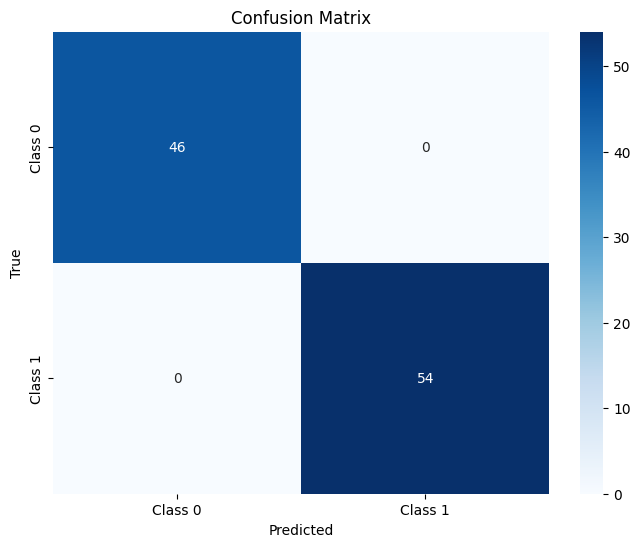

In [31]:

num_test_samples = len(X_test)
predictions = []

for i in range(num_test_samples):
    prediction = predict(X_test[i], trained_weights, trained_bias)
    predictions.append(prediction)

# Calculate accuracy
correct_predictions = sum(prediction == y_test[i] for i, prediction in enumerate(predictions))
accuracy = correct_predictions / num_test_samples
print(f"Accuracy on the test set: {accuracy}")

# Create confusion matrix
cm = confusion_matrix(y_test, predictions)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Class 0", "Class 1"], yticklabels=["Class 0", "Class 1"])
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()


Step10: Plot the decision boundary between two classified class.

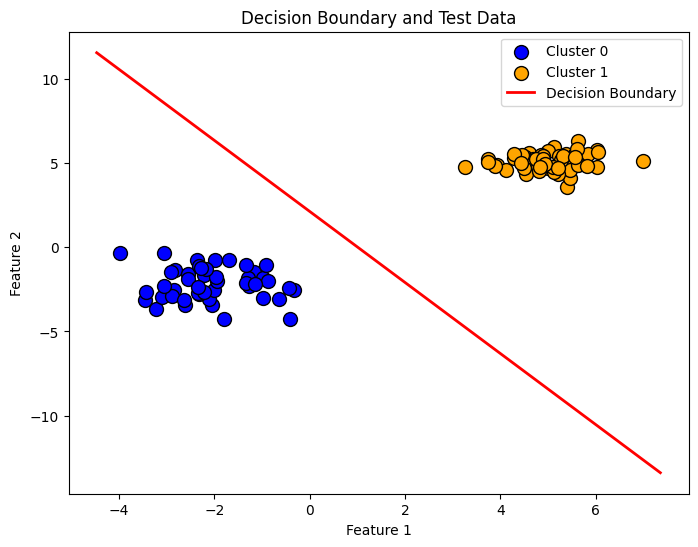

In [53]:
weights = trained_weights
b = trained_bias

# Check if the weights are 1D (two-dimensional input space) or 2D (multi-dimensional input space)
if len(weights) == 2:
    w1, w2 = weights
else:
    # For a multi-dimensional perceptron, use the first two weights for plotting
    w1, w2 = weights[:2]

# Generate x values for the decision boundary
x_decision_boundary = np.linspace(min(data[:, 0]), max(data[:, 0]), 100)
y_decision_boundary = (-trained_weights[0] / w2) * x_decision_boundary - b / w2

# Plot the decision boundary along with the scatter plot of test data
plt.figure(figsize=(8, 6))
# plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap='viridis', edgecolors='k', marker='o', s=100, label='Test Data')

# Assuming y_test has values 0 and 1 for the two clusters, adjust labels accordingly
plt.scatter(X_test[y_test == 0, 0], X_test[y_test == 0, 1], c='blue', edgecolors='k', marker='o', s=100, label='Cluster 0')
plt.scatter(X_test[y_test == 1, 0], X_test[y_test == 1, 1], c='orange', edgecolors='k', marker='o', s=100, label='Cluster 1')


plt.plot(x_decision_boundary, y_decision_boundary, label='Decision Boundary', color='red', linewidth=2)
plt.title('Decision Boundary and Test Data')
plt.xlabel('Feature 1')  # Corrected label for the x-axis
plt.ylabel('Feature 2')  # Corrected label for the y-axis
plt.legend()
plt.show()
